In [1]:
#Requisitos
#https://proj.org/download.html

In [22]:
!sudo apt-get install libgeos-dev
!sudo apt-get install libgeos-3.5.0
!pip install https://github.com/matplotlib/basemap/archive/master.zip

[sudo] senha para joao: 
[sudo] senha para joao: 

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [4]:
pd.set_option('display.max_columns', None)

In [5]:
dep_loc = pd.read_parquet('../../Resultados/Agg/Censo Escolar/Ens. Méd/dados_censo-esc_agg_dep_loc-0.parquet').reset_index().drop(columns='__null_dask_index__')
dep = pd.read_parquet('../../Resultados/Agg/Censo Escolar/Ens. Méd/dados_censo-esc_agg_dep-0.parquet').reset_index().drop(columns='__null_dask_index__')
pub_pvd = pd.read_parquet('../../Resultados/Agg/Censo Escolar/Ens. Méd/dados_censo-esc_agg_pub_pvd-0.parquet').reset_index().drop(columns='__null_dask_index__')

In [8]:
# Carregando coordenadas geográficas dos municípios
municip = pd.read_csv('../Utils/csv/municipios.csv', sep=',', encoding='utf-8', usecols=['codigo_ibge', 'nome', 'latitude', 'longitude', 'capital'])
municip.codigo_ibge = municip.codigo_ibge.astype(str)

In [13]:
# PBLE
pble = pd.read_csv('../../Resultados/Agg/PBLE/PBLE_agg_total_municipio.csv')

In [5]:
pub_pvd.head()

,NU_ANO_CENSO,SG_UF,CO_MUNICIPIO,TP_DEPENDENCIA_AGG,TP_SITUACAO_FUNCIONAMENTO,IN_AGUA_POTAVEL,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_AREA_VERDE,IN_BANHEIRO,IN_BIBLIOTECA,IN_LABORATORIO_INFORMATICA,IN_INTERNET,IN_INTERNET_APRENDIZAGEM,IN_INTERNET_ADMINISTRATIVO,IN_INTERNET_COMUNIDADE,IN_ACESSO_INTERNET_COMPUTADOR,IN_ACES_INTERNET_DISP_PESSOAIS,IN_BANDA_LARGA,IN_EXAME_SELECAO,QT_DOC_MED,TP_REDE_LOCAL
0,2018,AC,1200013,1,1.0,NaN,0.000000,0.000000,0.333333,NaN,0.333333,0.333333,0.666667,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.0,NaN
1,2018,AC,1200054,1,1.0,NaN,0.000000,0.000000,0.500000,NaN,0.000000,0.500000,0.500000,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.0,NaN
2,2018,AC,1200104,1,1.0,NaN,0.000000,0.000000,0.666667,NaN,0.000000,0.666667,0.666667,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.0,NaN
3,2018,AC,1200138,1,1.0,NaN,0.090909,0.090909,0.090909,NaN,0.000000,0.090909,0.090909,NaN,NaN,NaN,NaN,NaN,1.000000,NaN,0.0,NaN
4,2018,AC,1200179,1,1.0,NaN,0.000000,0.000000,0.333333,NaN,0.000000,0.333333,1.000000,NaN,NaN,NaN,NaN,NaN,0.333333,NaN,0.0,NaN


Iniciando investigação com seleção das escolas públicas

In [10]:
pub = pub_pvd[pub_pvd["TP_DEPENDENCIA_AGG"] == 1]
pub_19 = pub[pub["NU_ANO_CENSO"] == 2019]
pub_20 = pub[pub["NU_ANO_CENSO"] == 2020]
pub_21 = pub[pub["NU_ANO_CENSO"] == 2021]

In [11]:
# Acrescentando coordenadas geográficas
pub_19 = pub_19.merge(municip, left_on='CO_MUNICIPIO', right_on='codigo_ibge')

In [18]:
pble = pble[pble['Ano_Ativacao'] == 2019]

In [19]:
pble.merge(pub_19, left_on='Municipio', right_on='nome')

,Ano_Ativacao,Municipio,velocidade_median,velocidade_mean,NU_ANO_CENSO,SG_UF,CO_MUNICIPIO,TP_DEPENDENCIA_AGG,TP_SITUACAO_FUNCIONAMENTO,IN_AGUA_POTAVEL,IN_ENERGIA_INEXISTENTE,IN_ESGOTO_INEXISTENTE,IN_AREA_VERDE,IN_BANHEIRO,IN_BIBLIOTECA,IN_LABORATORIO_INFORMATICA,IN_INTERNET,IN_INTERNET_APRENDIZAGEM,IN_INTERNET_ADMINISTRATIVO,IN_INTERNET_COMUNIDADE,IN_ACESSO_INTERNET_COMPUTADOR,IN_ACES_INTERNET_DISP_PESSOAIS,IN_BANDA_LARGA,IN_EXAME_SELECAO,QT_DOC_MED,TP_REDE_LOCAL,codigo_ibge,nome,latitude,longitude,capital
0,2019,Abaré,2.0,2.0,2019,BA,2900207,1,1.0,1.000000,0.0,0.0,0.000000,1.0,0.666667,0.666667,0.666667,0.0,0.666667,0.000000,0.0,0.000000,1.0,0.000000,0.0,0.0,2900207,Abaré,-8.72073,-39.1162,0
1,2019,Acaraú,2.0,2.0,2019,CE,2300200,1,1.0,0.833333,0.0,0.0,0.666667,1.0,1.000000,1.000000,1.000000,1.0,1.000000,0.166667,1.0,0.333333,1.0,0.166667,18.0,3.0,2300200,Acaraú,-2.88769,-40.1183,0
2,2019,Agrolândia,2.0,2.0,2019,SC,4200200,1,1.0,1.000000,0.0,0.5,0.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.5,0.500000,1.0,0.000000,6.0,3.0,4200200,Agrolândia,-27.40870,-49.8220,0
3,2019,Aguiar,2.0,2.0,2019,PB,2500205,1,1.0,1.000000,0.0,0.0,0.000000,1.0,1.000000,1.000000,1.000000,1.0,1.000000,0.000000,0.0,0.000000,1.0,0.000000,18.0,2.0,2500205,Aguiar,-7.09180,-38.1681,0
4,2019,Aldeias Altas,2.0,2.0,2019,MA,2100303,1,1.0,1.000000,0.0,0.0,1.000000,1.0,1.000000,1.000000,1.000000,1.0,0.000000,0.000000,1.0,0.000000,1.0,0.000000,38.0,1.0,2100303,Aldeias Altas,-4.62621,-43.4689,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
455,2019,Viçosa,2.0,2.0,2019,RN,2414902,1,1.0,1.000000,0.0,0.0,0.000000,1.0,1.000000,0.000000,1.000000,1.0,1.000000,0.000000,0.0,0.000000,1.0,0.000000,4.0,0.0,2414902,Viçosa,-5.98253,-37.9462,0
456,2019,Várzea Paulista,2.0,2.0,2019,SP,3556503,1,1.0,1.000000,0.0,0.0,0.100000,1.0,0.000000,1.000000,0.800000,0.8,0.800000,0.000000,0.8,0.100000,1.0,0.000000,18.0,0.0,3556503,Várzea Paulista,-23.21360,-46.8234,0
457,2019,Xambioá,2.0,2.0,2019,TO,1722107,1,1.0,1.000000,0.0,0.0,1.000000,1.0,1.000000,0.000000,1.000000,1.0,1.000000,0.000000,1.0,1.000000,1.0,0.000000,13.0,3.0,1722107,Xambioá,-6.41410,-48.5320,0
458,2019,Água Boa,2.0,2.0,2019,MG,3100609,1,1.0,1.000000,0.0,0.0,0.333333,1.0,1.000000,1.000000,1.000000,1.0,1.000000,0.333333,1.0,0.666667,1.0,0.000000,11.0,3.0,3100609,Água Boa,-17.99140,-42.3806,0


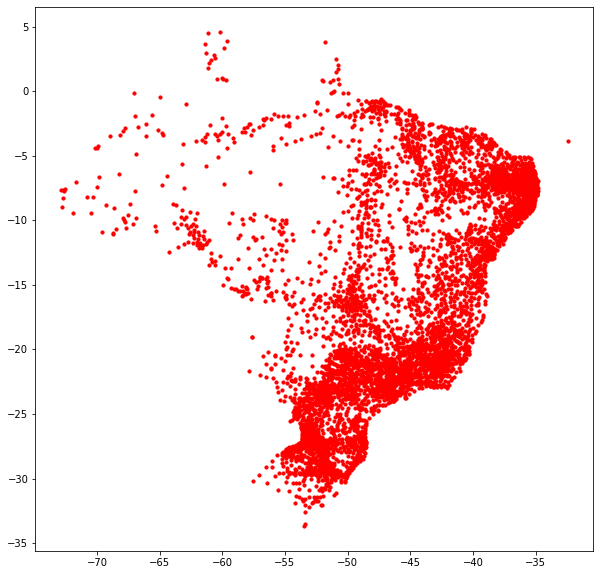

In [20]:
plt.figure(figsize=(10, 10))
plt.scatter(pub_19.longitude, pub_19.latitude, c='red', s=10)